In [1]:
import pandas as pd #type: ignore
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df = df.dropna(subset=['total_bedrooms'])

In [8]:
df.shape

(20433, 10)

In [9]:
import matplotlib.pyplot as plt
features = list(df.columns)
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [11]:
output_feature = features[-2]
input_features = features[0:-2]
input_features.append(features[-1])
print(input_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


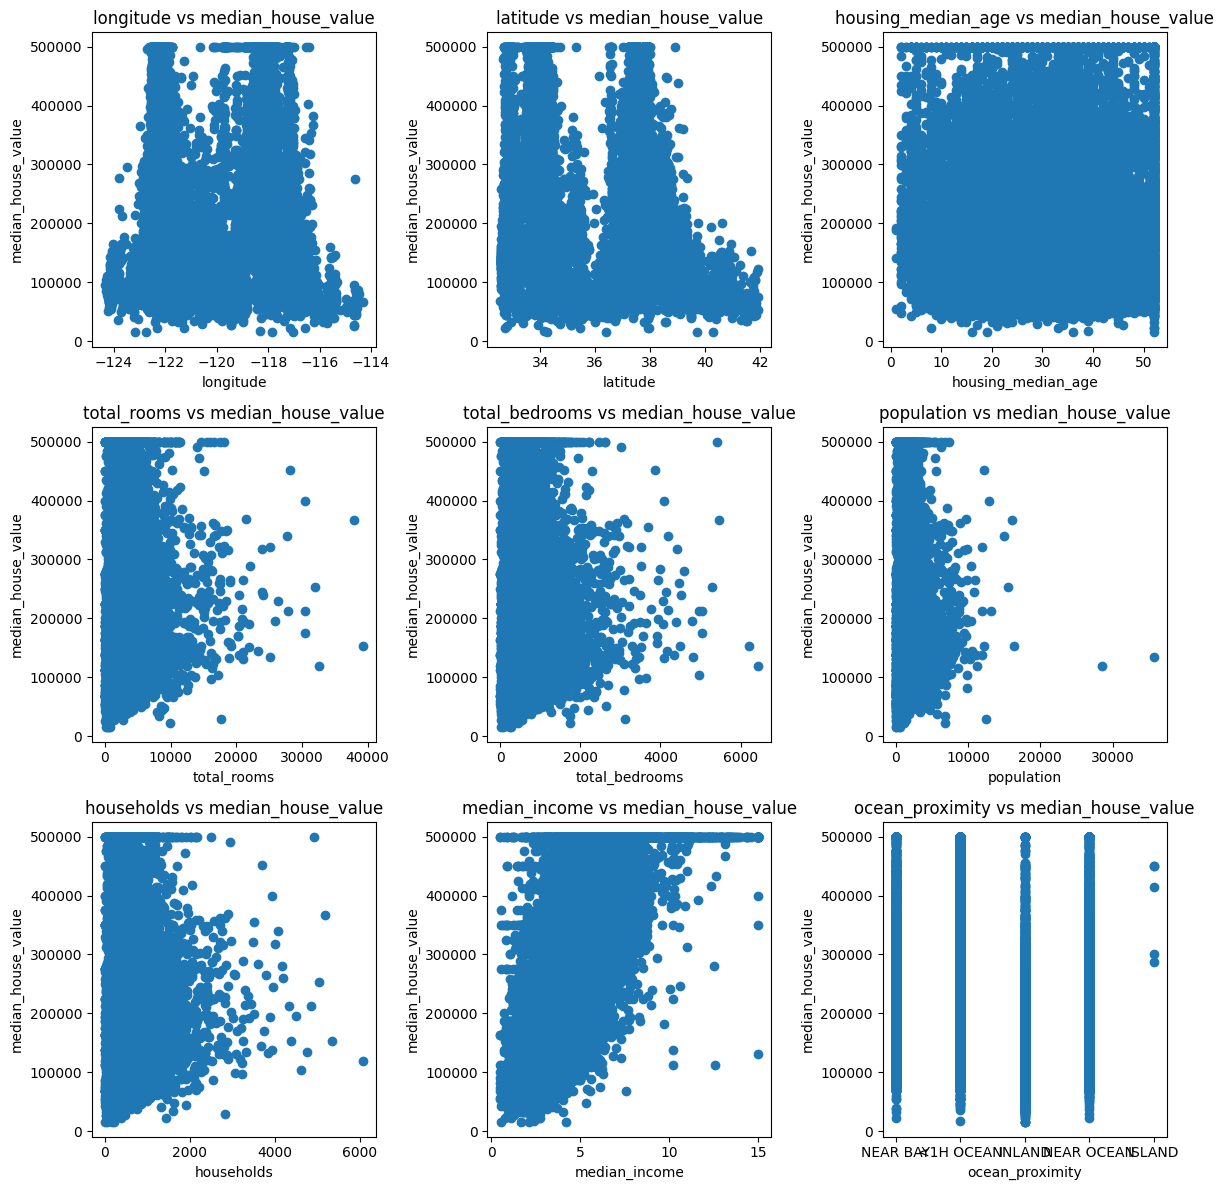

In [12]:
plt.figure(figsize=(12,12))
for i, features in enumerate(input_features):
    plt.subplot(3,3, i+1)
    plt.scatter(x = df[features], y = df[output_feature])
    plt.title(f'{features} vs {output_feature}')
    plt.xlabel(features)
    plt.ylabel(output_feature)

plt.tight_layout()
plt.show()

In [14]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
ocean_prox_dict = {}
for index, value in enumerate(df.ocean_proximity.unique()):
    ocean_prox_dict[value] = index
ocean_prox_dict

{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}

In [16]:
df.ocean_proximity = df.ocean_proximity.map(ocean_prox_dict)
df.ocean_proximity

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14912\4003656709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ocean_proximity = df.ocean_proximity.map(ocean_prox_dict)


0        0
1        0
2        0
3        0
4        0
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: ocean_proximity, Length: 20433, dtype: int64

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit(df)
scaled_array?? #type: ignore

Type:        StandardScaler
String form: StandardScaler()
File:        c:\arun\anaconda3\envs\condaenv\lib\site-packages\sklearn\preprocessing\_data.py
Source:     
class StandardScaler(OneToOneFeatureMixin, TransformerMixin, BaseEstimator):
    """Standardize features by removing the mean and scaling to unit variance.

    The standard score of a sample `x` is calculated as:

        z = (x - u) / s

    where `u` is the mean of the training samples or zero if `with_mean=False`,
    and `s` is the standard deviation of the training samples or one if
    `with_std=False`.

    Centering and scaling happen independently on each feature by computing
    the relevant statistics on the samples in the training set. Mean and
    standard deviation are then stored to be used on later data using
    :meth:`transform`.

    Standardization of a dataset is a common requirement for many
    machine learning estimators: they might behave badly if the
    individual features do not more or less loo

In [31]:
scaled_array = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_array, columns = df.columns)
scaled_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,-1.714816
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,-1.714816
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,-1.714816
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,-1.714816
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,-1.714816
...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,0.626570
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,0.626570
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,0.626570
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,0.626570


In [33]:
df.columns
input_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']
output_columns = ['median_house_value']

In [34]:

from sklearn.model_selection import train_test_split

X = scaled_df[input_columns]
y = scaled_df[output_columns]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,-1.714816
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-1.714816
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,-1.714816
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,-1.714816
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,-1.714816
...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,0.626570
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.626570
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,0.626570
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,0.626570


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (16346, 9)
Shape of X_test: (4087, 9)
Shape of y_test: (4087, 1)
Shape of y_train: (16346, 1)


In [36]:
from sklearn.svm import LinearSVR
regression_model = LinearSVR(epsilon = 1.5)
regression_model.fit(X_train, y_train)

c:\Arun\anaconda3\envs\condaEnv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Arun\anaconda3\envs\condaEnv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [37]:
y_pred = regression_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error is: {mse}')

Mean Squared Error is: 0.7282416281864947


In [39]:
from sklearn.svm import SVR
rbf_model = SVR(C=100, epsilon= 0.1)
rbf_model.fit(X_train, y_train)


c:\Arun\anaconda3\envs\condaEnv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [40]:
y_pred = rbf_model.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 0.22139345617954717


In [41]:
#Testing our results
test_df_input = pd.DataFrame(X_test, columns=input_columns)

In [43]:
test_df_input.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,14278,1.163292,-1.330912,-0.685629,-0.766745,-0.616721,-0.794178,-0.642009,-0.361913,1.797263
1,16224,-0.858142,1.112570,-2.115165,1.723626,1.372008,1.678508,1.196910,0.324307,0.626570
2,7646,0.714084,-0.801959,0.187977,0.500864,0.747860,0.783682,0.788843,-0.340905,-0.544123
3,1402,-1.247455,1.079803,0.108558,-0.629917,-0.621467,-0.633568,-0.728331,-0.515553,-1.714816
4,1328,-1.157613,1.103208,-1.956328,-0.213024,0.140325,-0.438542,-0.100535,0.121332,0.626570
...,...,...,...,...,...,...,...,...,...,...
4082,8204,0.709093,-0.876855,0.585070,0.127903,0.586484,-0.213511,0.652820,-0.143563,1.797263
4083,6206,0.808917,-0.750468,0.346814,-0.391039,-0.341431,0.081234,-0.322879,-0.280249,-0.544123
4084,2974,0.269868,-0.146619,-1.320978,0.038667,0.026412,-0.115557,0.061646,-0.691676,0.626570
4085,13314,1.073450,-0.727063,-0.050279,-0.153991,-0.282102,-0.099672,-0.145004,-0.203640,0.626570


In [48]:
test_data_predict = pd.DataFrame(y_pred, columns=['predict'])

In [49]:
test_data_predict

,predict
0,-0.324605
1,-0.539799
2,0.013911
3,-0.623494
4,-0.601115
...,...
4082,1.492753
4083,-0.342686
4084,-1.033603
4085,-0.756899


In [50]:
y_test

,median_house_value
14278,0.337301
16224,-0.597442
7646,0.098201
1402,0.120725
1328,-0.315027
...,...
8204,2.539456
6206,-0.424181
2974,-0.924039
13314,-0.685805


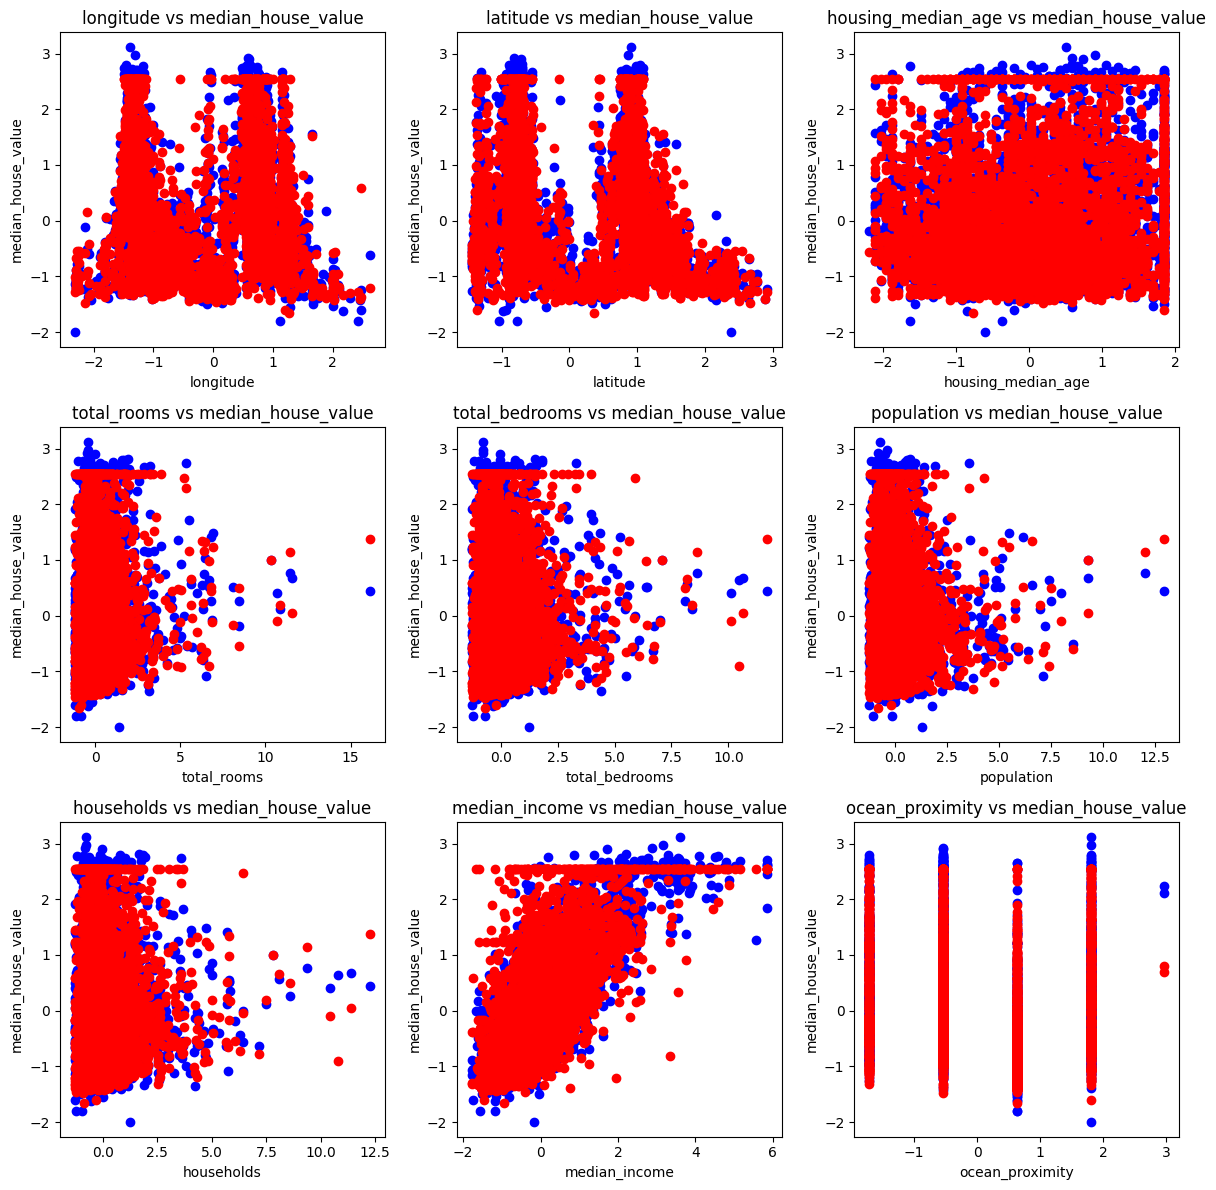

In [51]:
# Plotting with different colors
#plt.plot(test_df_input[''], y1, color='blue', label='y1 - Blue Line')
#plt.plot(x, y2, color='red', label='y2 - Red Line')
plt.figure(figsize=(12,12))
for i, features in enumerate(input_features):
    plt.subplot(3,3, i+1)
    plt.scatter(x = test_df_input[features], y = test_data_predict, color = 'blue', label = 'predict- Blue Line')
    plt.scatter(x = test_df_input[features], y = y_test, color = 'red', label = 'actual- Red Line')
    plt.title(f'{features} vs {output_feature}')
    plt.xlabel(features)
    plt.ylabel(output_feature)

plt.tight_layout()
plt.show()